In [1]:
import geopandas as gpd
import numpy as np

# Read the shapefile
shapefile_path = "True_forest.shp"
mt_kenya_shape = gpd.read_file(shapefile_path)

# Get the bounding box of the shapefile
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds

# Define the grid size
grid_size = 0.1  # Adjust this according to your preference

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, grid_size),
                                  np.arange(ymin, ymax, grid_size))

In [2]:
# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Flatten the grid indices array
flattened_indices = grid_indices.flatten()

In [3]:
# Assign unique identifier to each grid cell
identifier = 1
for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Assign identifier to grid cell
        lon_grid[i, j] = identifier
        lat_grid[i, j] = identifier
        identifier += 1

In [4]:
import pandas as pd

# Assuming you have a CSV file containing fire occurrence data
fire_data_path = 'fire_archive_M-C61_414680.csv'

# Read the CSV file into a DataFrame
fire_data = pd.read_csv(fire_data_path)

# Display the first few rows of the DataFrame
print(fire_data.head())


   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0    0.2122    37.7333       335.9   1.0    1.0  2001-08-11       801   
1    0.1272    37.5555       301.7   1.5    1.2  2001-08-11      2023   
2   -0.0990    37.4320       313.7   3.8    1.8  2001-09-13       843   
3   -0.1280    37.4616       339.6   3.9    1.8  2001-09-13       843   
4   -0.1350    37.4570       316.7   3.9    1.8  2001-09-13       843   

  satellite instrument  confidence  version  bright_t31    frp daynight  type  
0     Terra      MODIS          83     6.03       305.6   22.3        D     0  
1     Terra      MODIS          43     6.03       284.2   12.5        N     0  
2     Terra      MODIS          25     6.03       281.3   64.1        D     0  
3     Terra      MODIS          90     6.03       289.6  295.5        D     0  
4     Terra      MODIS          59     6.03       288.6   94.3        D     0  


In [5]:
for index, row in mt_kenya_shape.iterrows():
    # Extract the geometry of the current shape (polygon)
    polygon = row.geometry

    # Define the bounding box of the current grid cell
    xmin, ymin, xmax, ymax = polygon.bounds

    # Filter fire occurrences within the current grid cell
    fires_within_cell = fire_data[
        (fire_data['latitude'] >= ymin) & (fire_data['latitude'] <= ymax) &
        (fire_data['longitude'] >= xmin) & (fire_data['longitude'] <= xmax)
    ]
    
    
    fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])

    # Extract year and semi-annual information from acquisition_date
    fire_data['year'] = fire_data['grid_index'].agg.dt

    # Perform aggregation
    count = len(fires_within_cell)  # Count of fire occurrences
    avg_bright_t31 = fires_within_cell['bright_t31'].mean()  # Average bright_t31 values
    avg_time = fires_within_cell['acq_time'].mean()  # Average time values
    avg_occurrence = fires_within_cell['acq_date'].count()  # Average year column

    # Append aggregated data to the list
    aggregated_data.append({
        'geometry': polygon,  # Add geometry of the grid cell
        'count': count,
        'avg_bright_t31': avg_bright_t31,
        'avg_time': avg_time,
        'avg_occurrence': avg_occurrence
    })


KeyError: 'grid_index'

In [6]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
shapefile_path = "True_forest.shp"
mt_kenya_shape = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'fire_data' containing fire occurrences
# Load or create the DataFrame with latitude and longitude columns
fire_data = pd.read_csv("fire_archive_M-C61_414680.csv")

# Define the extent and resolution of the meshgrid
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, resolution),
                                  np.arange(ymin, ymax, resolution))

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data[
            (fire_data['latitude'] >= lat_min) & (fire_data['latitude'] < lat_max) &
            (fire_data['longitude'] >= lon_min) & (fire_data['longitude'] < lon_max)
        ]

        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_bright_t31 = fires_within_cell['bright_t31'].mean()  # Average bright_t31 values
        avg_time = fires_within_cell['acq_time'].mean()  # Average time values
        avg_occurrence = fires_within_cell['acq_date'].count()  # Average year column

        # Append aggregated data to the list
        aggregated_data.append({
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_bright_t31': avg_bright_t31,
            'avg_occurrence': avg_occurrence
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data.csv', index=False)


NameError: name 'lon_min' is not defined

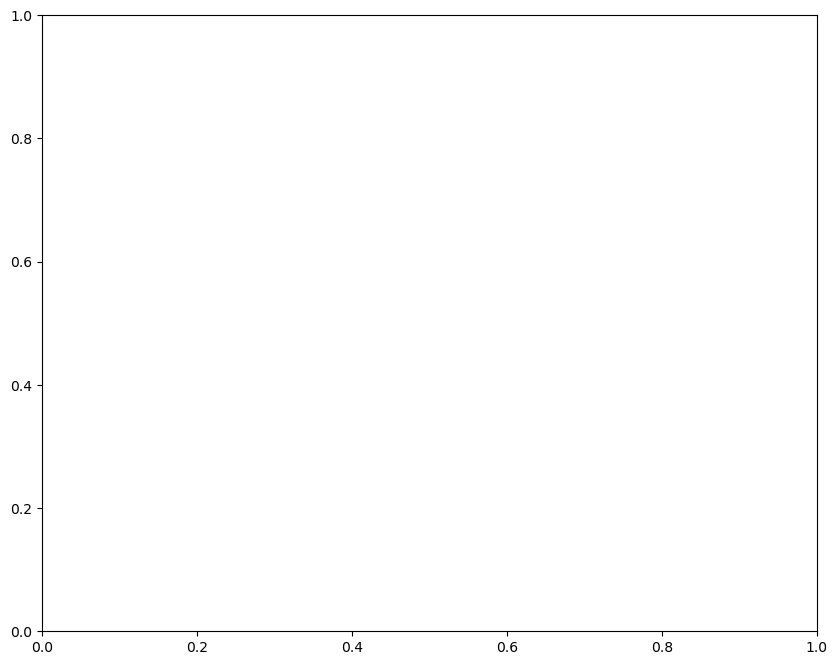

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

#counties = gpd.read_file('mt_kenya_shape ')
#final_data2 = fire_counts.drop(['fire_count','grid_cell_index','year'], axis=1)
fig, ax = plt.subplots(figsize=(10, 8))

# Set x and y axis limits
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
plt.grid(True)

# base = counties.plot(color='white', edgecolor='black')

#fire.plot(x="longitude", y="latitude", kind="scatter", ax=ax)
fire.plot(x="longitude", y="latitude", kind="scatter" , color='green', ax=ax)
# final_data2.plot(ax=base, x="longitude", y="latitude",marker='o', color='red', markersize=5)
counties.plot(ax=ax)
plt.grid()

In [7]:

# Output aggregated data as GeoDataFrame
aggregated_gdf = gpd.GeoDataFrame(aggregated_df, geometry=mt_kenya_shape.geometry.iloc[:len(aggregated_df)])
aggregated_gdf.to_file('aggregated_data.shp')

# Output aggregated data as DBF file (if needed)
aggregated_dbf_path = 'aggregated_data.dbf'
#aggregated_gdf.drop(columns='geometry').to_file(aggregated_dbf_path, driver='DBF')

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_11168\412134986.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aggregated_gdf.to_file('aggregated_data.shp')


In [12]:
import libpysal as lps

# Create a W object representing queen contiguity weights
w_queen = lps.weights.Queen.from_dataframe(aggregated_gdf)

# Check the neighbors of each observation
neighbors = w_queen.neighbors

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_14316\899370067.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lps.weights.Queen.from_dataframe(aggregated_gdf)


AttributeError: 'NoneType' object has no attribute 'geom_type'

In [24]:
import esda

# Compute local Moran's I
local_moran = esda.moran.Moran_Local(y, w)

NameError: name 'y' is not defined

In [25]:
import matplotlib.pyplot as plt

# Plot Moran's Local I values
esda.plot_local_autocorrelation(local_moran, aggregated_data_gdf, p=0.05, figsize=(10, 8))
plt.show()

AttributeError: module 'esda' has no attribute 'plot_local_autocorrelation'

In [26]:
import matplotlib.pyplot as plt


# Plot scatterplot
plt.scatter(aggregated_data_df['variable'], aggregated_data_df['fire_occurrences'])
plt.xlabel('Variable')
plt.ylabel('Fire Occurrences')
plt.title('Scatterplot')
plt.show()

NameError: name 'aggregated_data_df' is not defined

In [27]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(aggregated_data_df[['x', 'y']])

NameError: name 'aggregated_data_df' is not defined

In [19]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
shapefile_path = 'True_forest.shp'
mt_kenya_shape = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'fire_data' containing fire occurrences
# Load or create the DataFrame with latitude and longitude columns
fire_data = pd.read_csv('fire_archive_M-C61_414680.csv')
#fire_data = fire_data.set_index("acq_date")
fire_data['acq_date']= pd.to_datetime(fire_data['acq_date'])
fire_data["year"] = fire_data["acq_date"].dt.year
fire_data.head()

# Define the extent and resolution of the meshgrid
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, resolution),
                                  np.arange(ymin, ymax, resolution))

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data[
            (fire_data['latitude'] >= lat_min) & (fire_data['latitude'] < lat_max) &
            (fire_data['longitude'] >= lon_min) & (fire_data['longitude'] < lon_max)
        ]
        
        # Aggregate fire occurrences by year
        fire_counts_by_year = fires_within_cell['year'].value_counts().to_dict()
        
        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_bright_t31 = fires_within_cell['bright_t31'].mean()  # Average bright_t31 values
        avg_time = fires_within_cell['acq_time'].mean()  # Average time values
        #year = fires_within_cell['year'].sum  # Average year column

        # Append aggregated data to the list
        aggregated_data.append({
            'Latitude': lat_grid[i, j],
            'Longitude': lon_grid[i, j], 
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_bright_t31': avg_bright_t31,
            'avg_time': avg_time,
            'fire_counts_by_year': fire_counts_by_year
            #'year': year
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data1.csv', index=False)

# Output aggregated data as GeoDataFrame
#aggregated_gdf = gpd.GeoDataFrame(aggregated_df, geometry=mt_kenya_shape.geometry.iloc[:len(aggregated_df)])
#aggregated_gdf.to_file('aggregated_data1.shp')



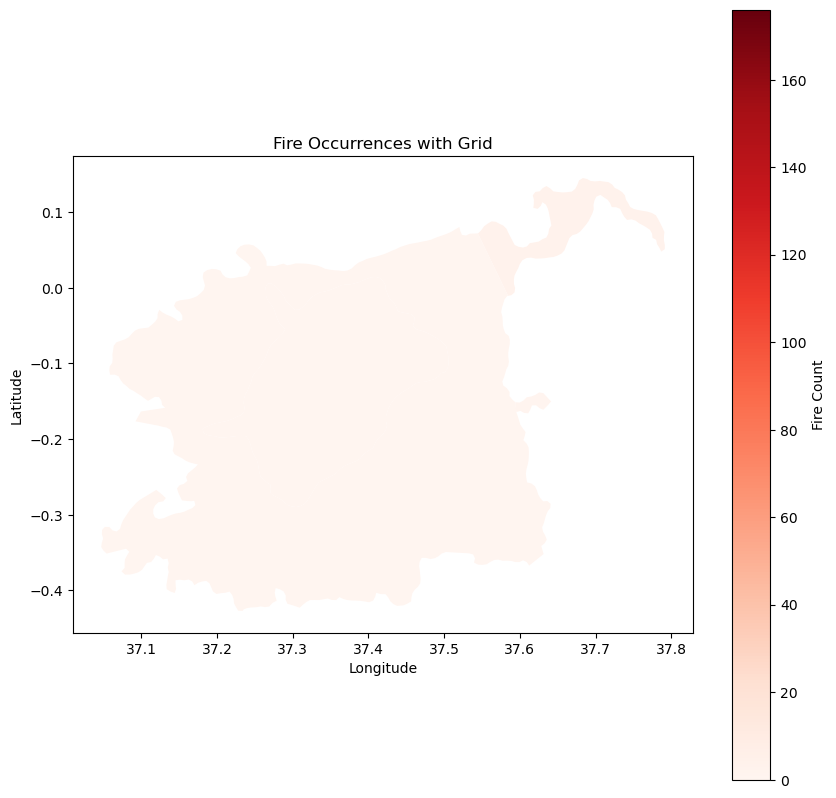

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_14316\96313269.py:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lp.weights.Queen.from_dataframe(aggregated_gdf)


AttributeError: 'NoneType' object has no attribute 'geom_type'

In [5]:
import libpysal as lp
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster





# Plot the grid result with the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
#mt_kenya_shape.plot(ax=ax, color='lightgray', edgecolor='black')
aggregated_gdf.plot(ax=ax, column='count', cmap='Reds', legend=True, legend_kwds={'label': 'Fire Count'})
plt.title('Fire Occurrences with Grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()





# Perform spatial weighting using queen contiguity
w_queen = lp.weights.Queen.from_dataframe(aggregated_gdf)

# Compute Local Moran's I
moran_loc = lp.Moran_Local(aggregated_gdf['count'], w_queen)

# Plot Local Moran's scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

# Perform spatial clustering
lisa_cluster(moran_loc, aggregated_gdf, p=0.05, figsize=(10, 10))
plt.show()

In [ ]:
aggregated_gdf = gpd.GeoDataFrame(aggregated_df, geometry=mt_kenya_shape.geometry.iloc[:len(aggregated_df)])

# Drop rows with null geometry
mt_kenya_shape_valid = mt_kenya_shape.dropna(subset=['geometry'])

# Create GeoDataFrame with valid geometries
aggregated_gdf = gpd.GeoDataFrame(aggregated_df, geometry=mt_kenya_shape_valid.geometry.iloc[:len(aggregated_df)])

In [34]:
import libpysal as lp
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster




# Perform spatial weighting using queen contiguity
w_queen = lp.weights.Queen.from_dataframe(aggregated_gdf)

# Compute Local Moran's I
moran_loc = lp.Moran_Local(aggregated_gdf['count'], w_queen)

# Plot Local Moran's scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

# Perform spatial clustering
lisa_cluster(moran_loc, aggregated_gdf, p=0.05, figsize=(10, 10))
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_1468\2642614700.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lp.weights.Queen.from_dataframe(aggregated_gdf)


AttributeError: 'NoneType' object has no attribute 'geom_type'

In [35]:
# Check for null or None values in the geometry column
null_geometry_rows = mt_kenya_shape[mt_kenya_shape['geometry'].isnull()]

# Print information about null geometry rows
print(f"Number of rows with null geometry: {len(null_geometry_rows)}")
print("Rows with null geometry:")
print(null_geometry_rows)

Number of rows with null geometry: 0
Rows with null geometry:
Empty GeoDataFrame
Columns: [AREA, PERIMETER, PARK_POL_, PARK_POL_I, NUMBER, AREANAME, ISO3, SIZE, YEAR, IUCNCAT, LON, LAT, CNTRYNAME, DESIGNATE, IUCNUM, geometry]
Index: []


In [36]:
mt_kenya_shape = mt_kenya_shape.dropna(subset=['geometry'])

In [40]:
pip install libpysal --upgrade


Note: you may need to restart the kernel to use updated packages.


In [41]:
from esda.moran import Moran_Local


In [42]:
import libpysal as lp
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster




# Perform spatial weighting using queen contiguity
w_queen = lp.weights.Queen.from_dataframe(mt_kenya_shape)

# Compute Local Moran's I
moran_loc = lp.Moran_Local(mt_kenya_shape['count'], w_queen)

# Plot Local Moran's scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

# Perform spatial clustering
lisa_cluster(moran_loc, aggregated_gdf, p=0.05, figsize=(10, 10))
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_1468\3798117212.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lp.weights.Queen.from_dataframe(mt_kenya_shape)


AttributeError: module 'libpysal' has no attribute 'Moran_Local'

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as lp
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local  # Import Moran_Local from esda

data = pd.read_csv("aggregated_data1.csv")

# Step 2: Create a GeoDataFrame if your data has spatial information
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.grid_index, data.avg_time))

# Step 3: Create a spatial weights matrix
# Here, we'll use Queen contiguity as an example
w = lp.Queen.from_dataframe(gdf)

# Perform spatial weighting using queen contiguity
#w_queen = lp.weights.Queen.from_dataframe(aggregated_data1['count'], w)
moran_loc = esda.moran.Moran_Local(aggregated_data1['count'], w)

# Compute Local Moran's I
#moran_loc = Moran_Local(aggregated_data1['count'], w=w_queen)

# Plot Local Moran's scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

# Perform spatial clustering
lisa_cluster(moran_loc, mt_kenya_shape, p=0.05, figsize=(10, 10))
plt.show()


AttributeError: module 'libpysal' has no attribute 'Queen'

In [ ]:
aggregated_gdf

ValueError: could not convert string to float: '{2003: 1, 2006: 1, 2015: 1}'

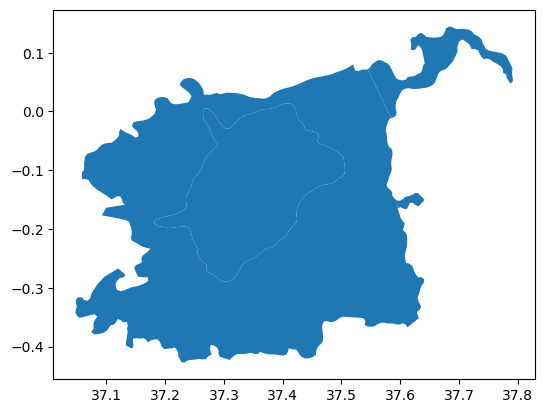

In [1]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster

# Read your dataset into a DataFrame
data = pd.read_csv("aggregated_data1.csv")
gdf = gpd.read_file("True_forest.shp")
gdf.plot()

# Step 2: Create a GeoDataFrame if your data has spatial information
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.grid_index, data))
# Step 3: Create a spatial weights matrix
# Here, we'll use Queen contiguity as an example
w_queen = lp.Queen.from_dataframe(gdf)


# Spatial weighting using Queen contiguity based on grid indices
#w_queen = lp.weights.Queen.from_dataframe(data, idVariable='grid_index')


# Local spatial autocorrelation analysis using Moran's I
moran_loc = lp.Moran_Local(data['count'], w_queen)

# Plot Moran's I scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

# Spatial clustering to identify hotspots, coldspots, and outliers
lisa_cluster(moran_loc, data, p=0.05, figsize=(10, 10))
plt.show()


In [1]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

ModuleNotFoundError: No module named 'rioxarray'

In [2]:
pip install rioxarray

  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/48/07/f707d40e8a026a47b9419e11d79216128296c50eb59b0deb241eac3e16e7/rioxarray-0.15.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/53.7 kB ? eta -:--:--
   ---------------------- ----------------- 30.7/53.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 53.7/53.7 kB 557.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install contextily

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/17/19/1051cd673ea58286b5148bf5c6eb42bdadb0b0b335c601cd5cea549aa17b/contextily-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
     ---------------------------- --------- 30.7/40.3 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 477.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 991.0 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 825.8 kB/s eta 0:00:01
   -------------------------------------  122.9/125.4 kB 901.1 k

In [6]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  as sbn# Graphics
import geopandas as gpd # Spatial data manipulation
import pandas as pd # Tabular data manipulation
import rioxarray as rx # Surface data manipulation
import xarray   as x# Surface data manipulation
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily as cont  # Background tiles
from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

%matplotlib inline

,grid_index,count,avg_bright_t31,avg_time,fire_counts_by_year
0,1,3,296.433333,1494.0,"{2003: 1, 2006: 1, 2015: 1}"
1,2,0,NaN,NaN,{}
2,3,0,NaN,NaN,{}
3,4,1,285.000000,2016.0,{2009: 1}
4,5,0,NaN,NaN,{}


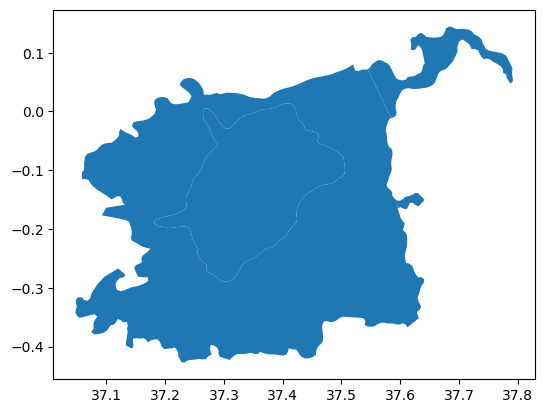

In [4]:
# Read your dataset into a DataFrame
data = pd.read_csv("aggregated_data1.csv")
gdf = gpd.read_file("True_forest.shp")
gdf.plot()
data.head()

fig ax,ax

In [13]:
import geopandas as gpd
import numpy as np
import pandas as pd
import libpysal as lp
from splot.esda import moran_scatterplot, lisa_cluster
from sklearn.cluster import DBSCAN

data = pd.read_csv("aggregated_data1.csv")
gdf = gpd.read_file("aggregated_data1.shp")

# Convert DataFrame to numpy array
data_array = data[['count', 'avg_bright_t31', 'avg_time']].values

# Create spatial weights matrix
w_queen = lp.weights.util.full2W(lp.weights.spatial_lag.lag_spatial(lp.weights.util.full(data_array), inplace=False))

# 2. Local Spatial Autocorrelation Analysis using Moran's I based on fire occurrences
moran_loc = lp.Moran_Local(data['count'], w_queen)

# Plot Moran's I local scatterplot and label the quadrants
fig, ax = moran_scatterplot(moran_loc, p=0.05)
# Add labels to quadrants
plt.text(-2, 1, 'High-High', fontsize=12)
plt.text(1, -1.5, 'Low-Low', fontsize=12)
plt.text(-2, -1.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'full'

In [22]:
import geopandas as gpd
import numpy as np
import pandas as pd
import libpysal as lp
from splot.esda import moran_scatterplot, lisa_cluster
from sklearn.cluster import DBSCAN

data = pd.read_csv("aggregated_data1.csv")
gdf = gpd.read_file("aggregated_data1.shp")

In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load CSV data into a DataFrame
data = pd.read_csv('aggregated_data1.csv')

# Create synthetic geometries (points) based on latitude and longitude
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Drop the latitude and longitude columns if you don't need them anymore
gdf = gdf.drop(columns=['latitude', 'longitude'])

# Display the GeoDataFrame
print(gdf.head())

KeyError: 'longitude'

In [43]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
shapefile_path = 'True_forest.shp'
mt_kenya_shape = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'fire_data' containing fire occurrences
# Load or create the DataFrame with latitude and longitude columns
fire_data = pd.read_csv('fire_archive_M-C61_414680.csv')
fire_data['acq_date']= pd.to_datetime(fire_data['acq_date'])
fire_data["year"] = fire_data["acq_date"].dt.year

# Define the extent and resolution of the meshgrid
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, resolution),
                                  np.arange(ymin, ymax, resolution))

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data[
            (fire_data['latitude'] >= lat_min) & (fire_data['latitude'] < lat_max) &
            (fire_data['longitude'] >= lon_min) & (fire_data['longitude'] < lon_max)
        ]
        
        # Aggregate fire occurrences by year
        fire_counts_by_year = fires_within_cell['year'].value_counts().to_dict()
        
        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_bright_t31 = fires_within_cell['bright_t31'].mean()  # Average bright_t31 values
        avg_time = fires_within_cell['acq_time'].mean()  # Average time values

        # Append aggregated data to the list
        aggregated_data.append({
            'Latitude': lat_grid[i, j],
            'Longitude': lon_grid[i, j], 
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_bright_t31': avg_bright_t31,
            'avg_time': avg_time,
            'fire_counts_by_year': fire_counts_by_year
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data_with_latlon.csv', index=False)
#aggregated_df.to_file("aggregated_dat_with_latlon.shp", index=False)


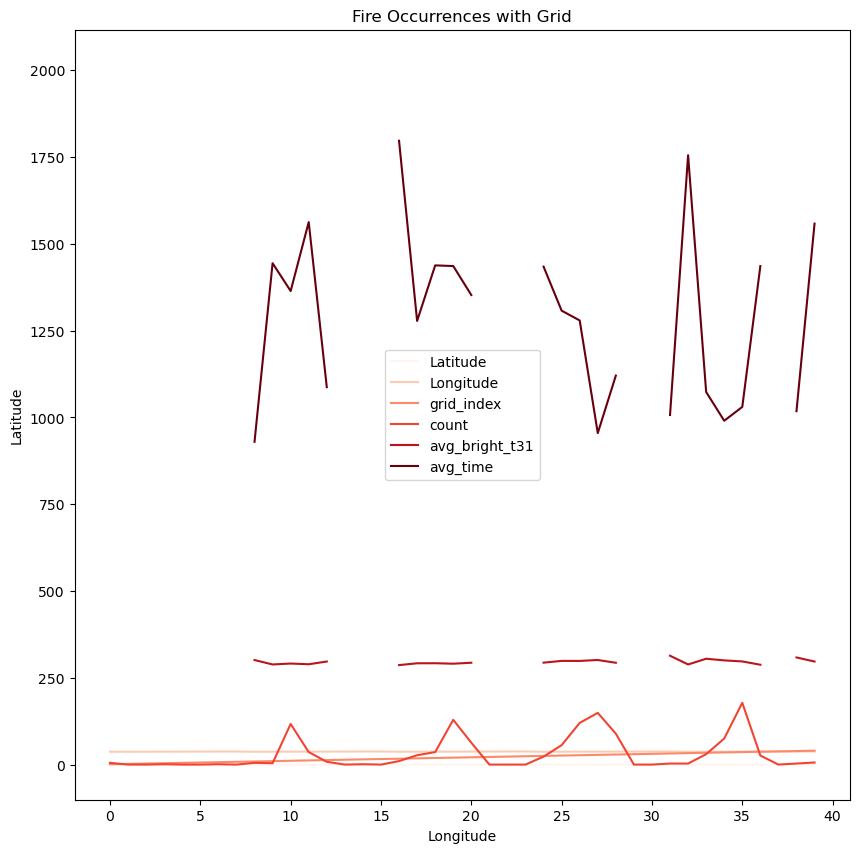

In [7]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
shapefile_path = 'fire_archive_M-C61_423902.shp'
mt_kenya_shape = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'fire_data' containing fire occurrences
# Load or create the DataFrame with latitude and longitude columns
fire_data = pd.read_csv('fire_archive_M-C61_414680.csv')
fire_data['acq_date']= pd.to_datetime(fire_data['acq_date'])
fire_data["year"] = fire_data["acq_date"].dt.year

# Define the extent and resolution of the meshgrid
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, resolution),
                                  np.arange(ymin, ymax, resolution))

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data[
            (fire_data['latitude'] >= lat_min) & (fire_data['latitude'] < lat_max) &
            (fire_data['longitude'] >= lon_min) & (fire_data['longitude'] < lon_max)
        ]
        
        # Aggregate fire occurrences by year
        fire_counts_by_year = fires_within_cell['year'].value_counts().to_dict()
        
        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_bright_t31 = fires_within_cell['bright_t31'].mean()  # Average bright_t31 values
        avg_time = fires_within_cell['acq_time'].mean()  # Average time values

        # Append aggregated data to the list
        aggregated_data.append({
            'Latitude': lat_grid[i, j],
            'Longitude': lon_grid[i, j], 
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_bright_t31': avg_bright_t31,
            'avg_time': avg_time,
            'fire_counts_by_year': fire_counts_by_year
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data_with_latlon1.csv', index=False)
#aggregated_df.to_file("aggregated_dat_with_latlon.shp", index=False)
# Plot the grid result with the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
#mt_kenya_shape.plot(ax=ax, color='lightgray', edgecolor='black')
aggregated_df.plot(ax=ax, column='count', cmap='Reds', legend=True)#, legend_kwds={'label': 'count'})
plt.title('Fire Occurrences with Grid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
shapefile_path = 'fire_archive_M-C61_423902.shp'
mt_kenya_shape = gpd.read_file(shapefile_path)

# Assuming you have a DataFrame named 'fire_data' containing fire occurrences
# Load or create the DataFrame with latitude and longitude columns
# fire_data = pd.read_csv('fire_archive_M-C61_414680.csv')

# Instead of reading the CSV file, use the geometry data from the shapefile
fire_data = mt_kenya_shape.copy()
fire_data['ACQ_DATE'] = pd.to_datetime(fire_data['ACQ_DATE'])
fire_data["year"] = fire_data["ACQ_DATE"].dt.year

# Define the extent and resolution of the meshgrid
xmin, ymin, xmax, ymax = mt_kenya_shape.total_bounds
resolution = 0.1  # Set the resolution of the meshgrid (spacing between grid points)

# Create meshgrid
lon_grid, lat_grid = np.meshgrid(np.arange(xmin, xmax, resolution),
                                  np.arange(ymin, ymax, resolution))

# Assign unique identifier to each grid cell
grid_indices = np.arange(1, len(lon_grid.flat) + 1).reshape(lon_grid.shape)

# Aggregate fire occurrences within each grid cell
aggregated_data = []

for i in range(lon_grid.shape[0]):
    for j in range(lon_grid.shape[1]):
        # Define the bounding box of the current grid cell
        lon_min = lon_grid[i, j]
        lon_max = lon_grid[i, j] + resolution
        lat_min = lat_grid[i, j]
        lat_max = lat_grid[i, j] + resolution

        # Filter fire occurrences within the current grid cell
        fires_within_cell = fire_data.cx[lon_min:lon_max, lat_min:lat_max]
        
        # Aggregate fire occurrences by year
        fire_counts_by_year = fires_within_cell['year'].value_counts().to_dict()
        
        # Perform aggregation
        count = len(fires_within_cell)  # Count of fire occurrences
        avg_bright_t31 = fires_within_cell['BRIGHT_T31'].mean()  # Average bright_t31 values
        avg_time = fires_within_cell['ACQ_TIME'].mean()  # Average time values

        # Append aggregated data to the list
        aggregated_data.append({
            'Latitude': lat_grid[i, j],
            'Longitude': lon_grid[i, j], 
            'grid_index': grid_indices[i, j],
            'count': count,
            'avg_bright_t31': avg_bright_t31,
            'avg_time': avg_time,
            'fire_counts_by_year': fire_counts_by_year
        })

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data_with_latlon2.csv', index=False)

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(aggregated_df.Longitude, aggregated_df.Latitude)
aggregated_gdf = gpd.GeoDataFrame(aggregated_df, geometry=geometry)

# Output aggregated data as a shapefile
aggregated_gdf.to_file('aggregated_data2.shp')



C:\Users\DANIEL\AppData\Local\Temp\ipykernel_11576\4187738292.py:76: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aggregated_gdf.to_file('aggregated_data2.shp')


KeyError: 'acq_date'

In [5]:
import geopandas as gpd
from shapely.geometry import Point

# Assuming aggregated_df is a DataFrame with latitude and longitude columns
# Create a GeoDataFrame by specifying geometry information
geometry = [Point(xy) for xy in zip(aggregated_df['Longitude'], aggregated_df['Latitude'])]
crs = {'init': 'epsg:4326'}  # Assuming the coordinate reference system (CRS) is WGS84
aggregated_gdf = gpd.GeoDataFrame(aggregated_df, crs=crs, geometry=geometry)

# Export the GeoDataFrame to a shapefile
aggregated_gdf.to_file("aggregated_dat_with_latlon.shp")

C:\Users\DANIEL\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_9028\825091924.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aggregated_gdf.to_file("aggregated_dat_with_latlon.shp")


In [6]:
pip install libpysal

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Perform spatial clustering (hotspots, coldspots, outliers)
lisa_cluster(moran_loc, gdf, p=0.05, figsize=(10, 8))
plt.show()

# Export the results as a choropleth map
gdf['cluster'] = moran_loc.q
gdf.to_file('spatial_clusters.shp')

# You can use GIS software like QGIS to visualize the choropleth map


NameError: name 'lisa_cluster' is not defined

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8388\2924268849.py:27: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lp.weights.Queen.from_dataframe(gdf)


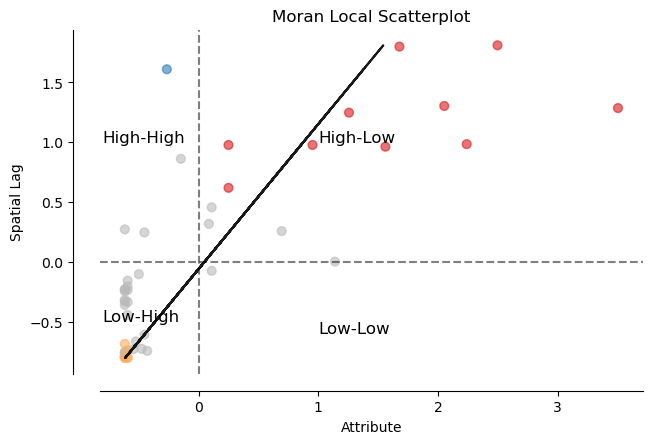

In [6]:
import geopandas as gpd
import libpysal as lp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local

from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

%matplotlib inline


# Read the aggregated data with latitude and longitude
#aggregated_df = pd.read_csv('aggregated_data_with_latlon.csv')


# Create a GeoDataFrame from the aggregated data
geometry = gpd.points_from_xy(aggregated_df['Longitude'], aggregated_df['Latitude'])
gdf = gpd.GeoDataFrame(aggregated_df, geometry=geometry)

# Create spatial weights matrix using Queen contiguity
w_queen = lp.weights.Queen.from_dataframe(gdf)

# Perform local spatial autocorrelation analysis using Moran's Local
moran_loc = Moran_Local(gdf['count'], w_queen)

# Plot Moran's Local Scatterplot
#fig, ax = moran_scatterplot(moran_loc)
fig, ax = moran_scatterplot(moran_loc, p= 0.05)
plt.text(-0.8, 1, 'High-High', fontsize=12)
plt.text(1, -0.6, 'Low-Low', fontsize=12)
plt.text(-0.8, -0.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_11576\105295461.py:15: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = lp.weights.Queen.from_dataframe(gdf)


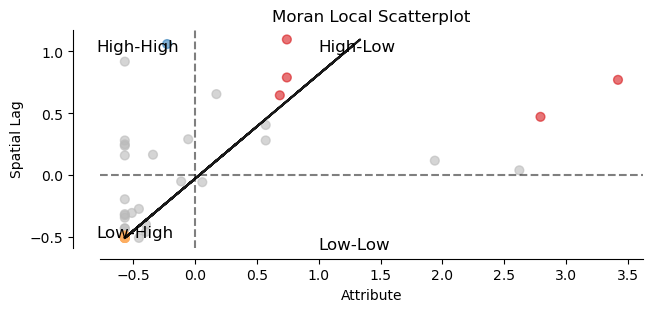

In [17]:
import geopandas as gpd
import libpysal as lp
from esda.moran import Moran_Local
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Read the shapefile containing aggregated data with latitude and longitude
#aggregated_shp = gpd.read_file("aggregated_dat_with_latlon.shp")
aggregated_shp = gpd.read_file('aggregated_data2.shp')

# Create a GeoDataFrame from the aggregated data
gdf = aggregated_shp

# Create spatial weights matrix using Queen contiguity
w_queen = lp.weights.Queen.from_dataframe(gdf)

# Perform local spatial autocorrelation analysis using Moran's Local
moran_loc = Moran_Local(gdf['count'], w_queen)

# Plot Moran's Local Scatterplot
fig, ax = moran_scatterplot(moran_loc, p=0.05)
plt.text(-0.8, 1, 'High-High', fontsize=12)
plt.text(1, -0.6, 'Low-Low', fontsize=12)
plt.text(-0.8, -0.5, 'Low-High', fontsize=12)
plt.text(1, 1, 'High-Low', fontsize=12)
plt.show()

<Axes: >

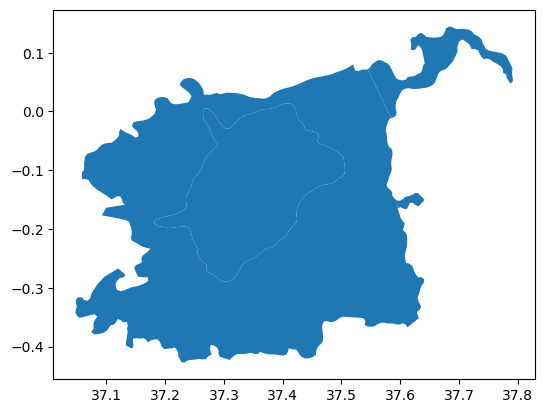

In [13]:
gdf = gpd.read_file("True_forest.shp")
gdf.plot()

In [30]:
import geopandas as gpd
import libpysal as lp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local

from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

%matplotlib inline



# Read the aggregated data with latitude and longitude
#aggregated_df = pd.read_csv('aggregated_data_with_latlon.csv')
aggregated_df = gpd.read_file("aggregated_dat_with_latlon.shp")
#aggregated_shp = gpd.read_file('aggregated_data2.shp')

# Create a GeoDataFrame from the aggregated data
geometry = gpd.points_from_xy(aggregated_df['Longitude'], aggregated_df['Latitude'])
gdf = gpd.GeoDataFrame(aggregated_df, geometry=geometry)


In [31]:
y = gdf['count'].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3176\2079158519.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


In [32]:
from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_3176\1127328127.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


0.5157743084199821

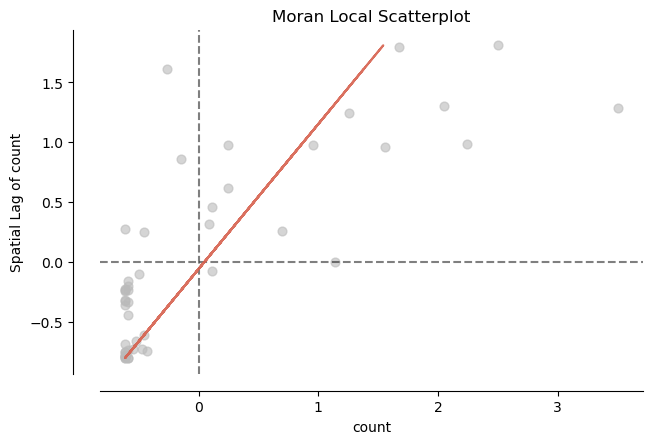

In [33]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of count')
plt.show()

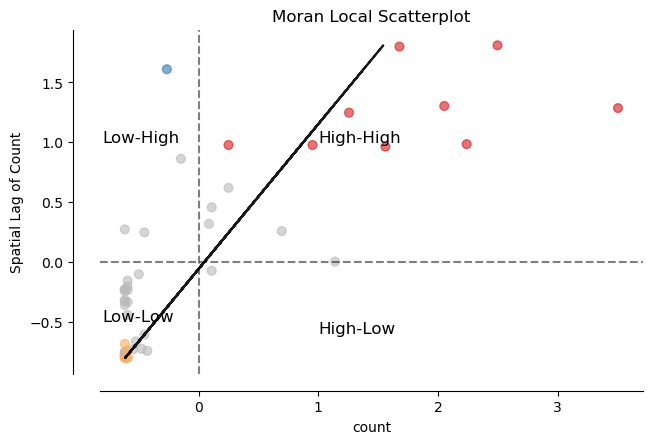

In [34]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of Count')
plt.text(-0.8, 1, 'Low-High', fontsize=12)
plt.text(1, -0.6, 'High-Low', fontsize=12)
plt.text(-0.8, -0.5, 'Low-Low', fontsize=12)
plt.text(1, 1, 'High-High', fontsize=12)
plt.show()

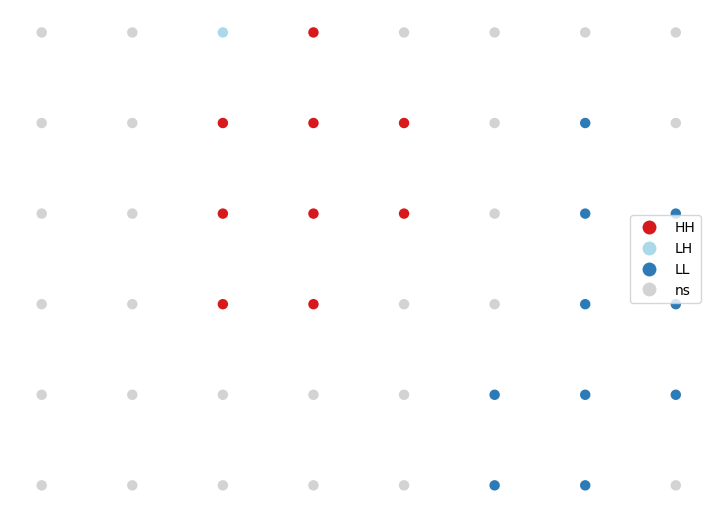

In [49]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()


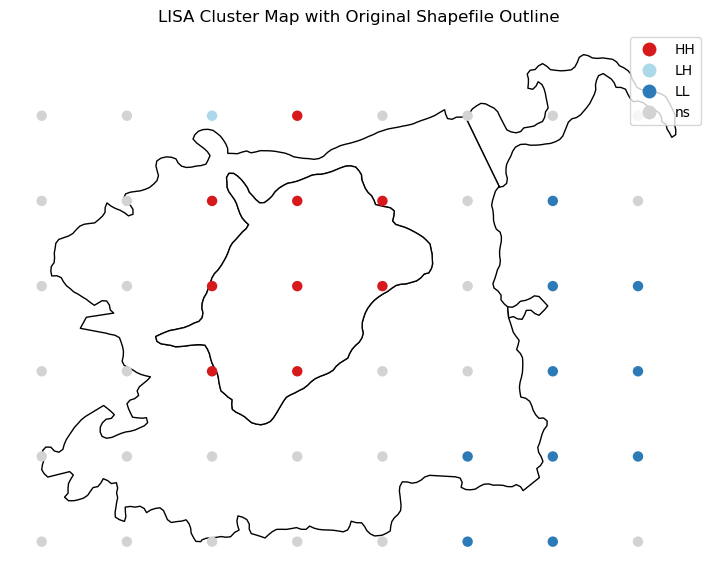

In [71]:
# Plot the original shapefile
fig, ax = plt.subplots(figsize=(9, 9))
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot the LISA cluster map
lisa_cluster(moran_loc, gdf, p=0.05, figsize=(9, 9), ax=ax)

plt.title('LISA Cluster Map with Original Shapefile Outline')
plt.show()

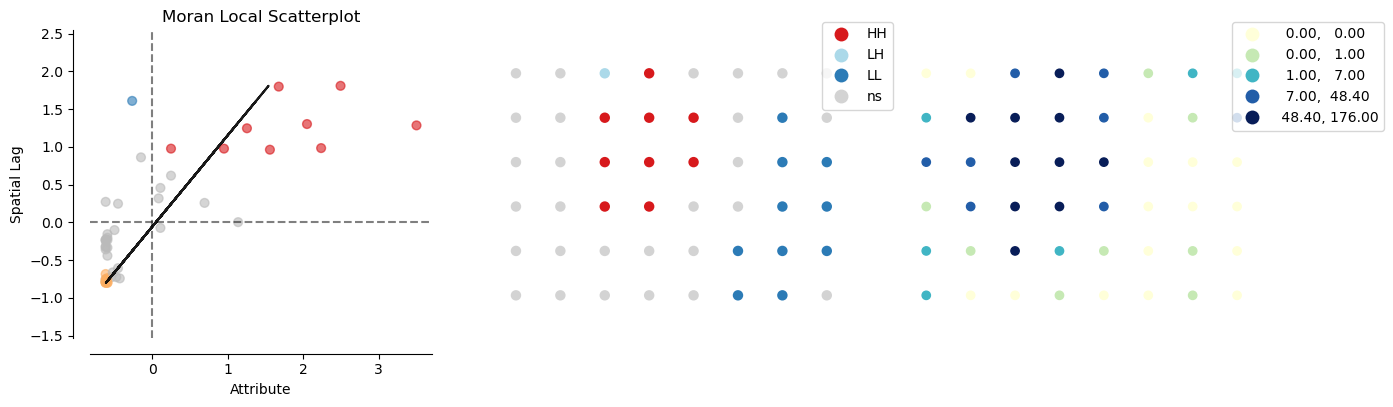

In [63]:
from splot.esda import plot_local_autocorrelation


plot_local_autocorrelation(moran_loc, gdf, 'count')
plt.show()


C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


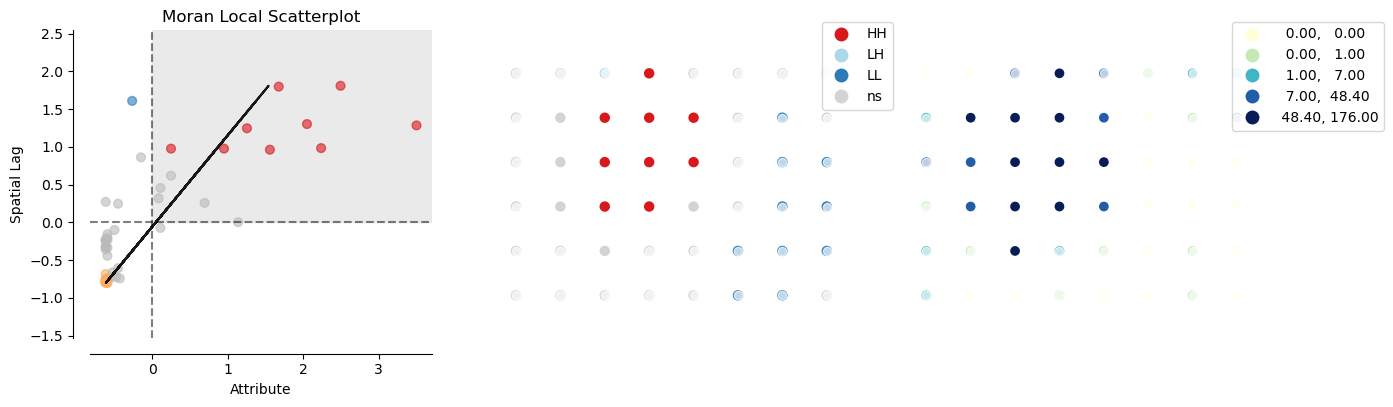

In [70]:

plot_local_autocorrelation(moran_loc, gdf, 'count', quadrant=1)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


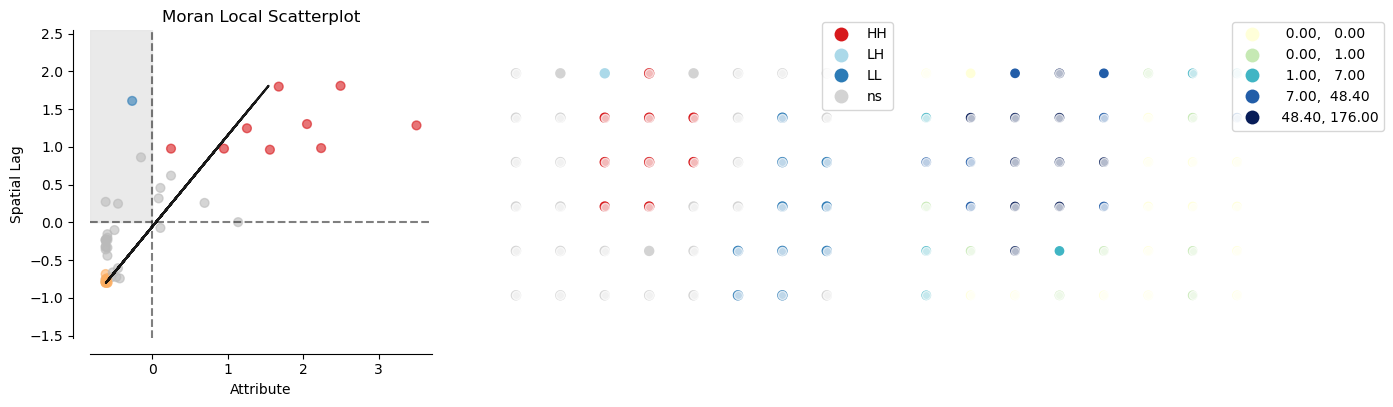

In [67]:
plot_local_autocorrelation(moran_loc, gdf, 'count', quadrant=2)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


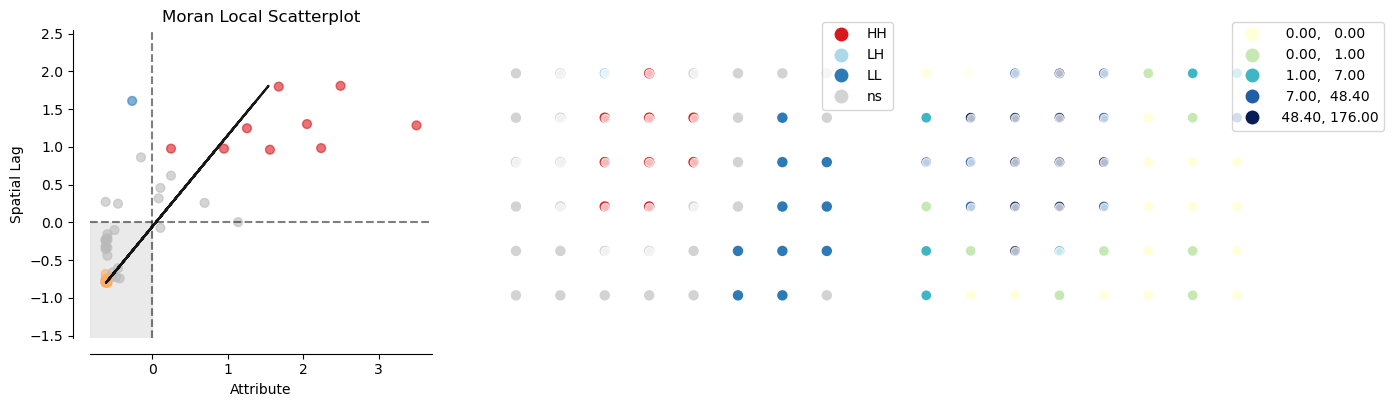

In [68]:
plot_local_autocorrelation(moran_loc, gdf, 'count', quadrant=3)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


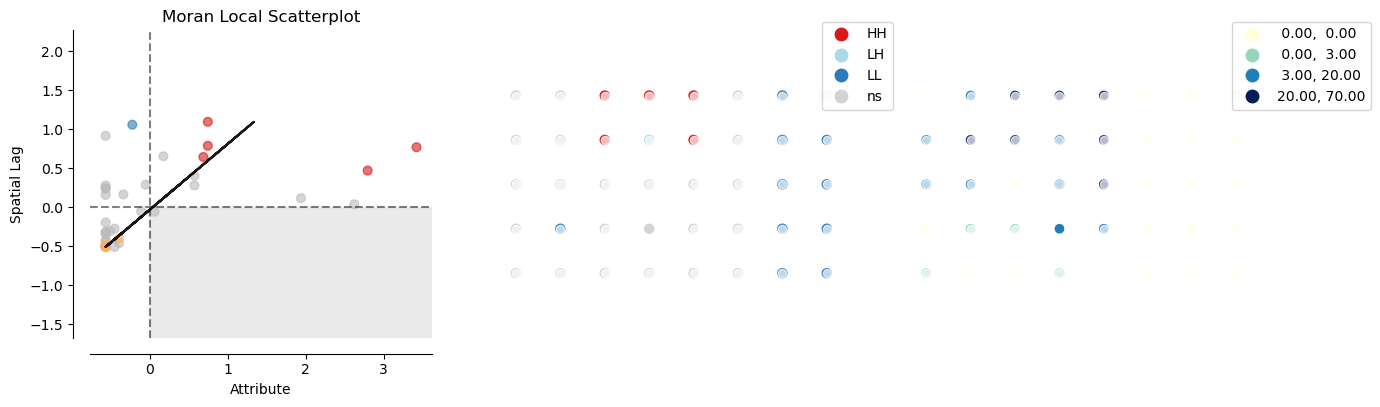

In [40]:
plot_local_autocorrelation(moran_loc, gdf, 'count', quadrant=4)
plt.show()

In [10]:
import pandas as pd

# Read CSV data into a DataFrame
data = pd.read_csv('aggregated_data_with_latlon.csv')

# Split 'fire_counts_by_year' column into 'year' and 'occurrence' columns
data[['year', 'occurrence']] = data['fire_counts_by_year'].str.extract(r'(\d+): (\d+)').astype(float)

# Group the data by year and perform any necessary aggregation
grouped_data = data.groupby('year').agg({
    'Latitude': 'mean',  # For example, take the mean latitude for each year
    'Longitude': 'mean',  # Take the mean longitude for each year
    'occurrence': 'sum'  # Sum the occurrences for each year
}).reset_index()

# Display the grouped data
print(grouped_data)

# Convert aggregated data to DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Output aggregated data as CSV file
aggregated_df.to_csv('aggregated_data_with_latlon2.csv', index=False)

      year  Latitude  Longitude  occurrence
0   2001.0  0.039521  37.647119         5.0
1   2003.0 -0.227146  37.047119         5.0
2   2004.0  0.072854  37.347119        12.0
3   2005.0 -0.327146  37.147119         1.0
4   2006.0 -0.327146  37.197119         5.0
5   2008.0 -0.027146  37.547119        24.0
6   2009.0 -0.207146  37.247119        84.0
7   2012.0 -0.207146  37.267119       128.0
8   2013.0  0.072854  37.247119         3.0
9   2015.0 -0.127146  37.547119         5.0
10  2019.0 -0.167146  37.267119       130.0
11  2021.0 -0.427146  37.647119         1.0
12  2022.0  0.022854  37.547119        30.0


NameError: name 'aggregated_data' is not defined

In [27]:
import pandas as pd

# Load the CSV file
file_path = 'aggregated_data_with_latlon.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Latitude,Longitude,grid_index,count,avg_bright_t31,avg_time,fire_counts_by_year
0,-0.427146,37.047119,1,3,296.433333,1494.0,"{2003: 1, 2006: 1, 2015: 1}"
1,-0.427146,37.147119,2,0,NaN,NaN,{}
2,-0.427146,37.247119,3,0,NaN,NaN,{}
3,-0.427146,37.347119,4,1,285.000000,2016.0,{2009: 1}
4,-0.427146,37.447119,5,0,NaN,NaN,{}


In [20]:
# Transforming the 'fire_counts_by_year' dictionary into a long format
# Each row will now represent a unique combination of the original row and a year, with a fire count for that year.

# First, we create a function to transform each row's 'fire_counts_by_year' into a list of dictionaries,
# each containing the year and the corresponding fire count
def expand_fire_counts(row):
    return [{'year': year, 'fire_count': count} for year, count in row['fire_counts_by_year'].items()]

# Apply the function to each row and then explode the dataframe to have a long format
data_long = data.copy()
data_long['year_fire_count'] = data.apply(expand_fire_counts, axis=1)
data_long = data_long.explode('year_fire_count').reset_index(drop=True)

import ast  # To safely evaluate string literals as Python expressions

# Convert 'fire_counts_by_year' from string representation of dictionary to actual dictionary
data['fire_counts_by_year'] = data['fire_counts_by_year'].apply(lambda x: ast.literal_eval(x))




# Extract 'year' and 'fire_count' from the dictionaries
data_long['year'] = data_long['year_fire_count'].apply(lambda x: x.get('year') if pd.notnull(x) else None)
data_long['fire_count'] = data_long['year_fire_count'].apply(lambda x: x.get('fire_count') if pd.notnull(x) else None)

# Drop the original 'fire_counts_by_year' and 'year_fire_count' columns as they're no longer needed
data_long.drop(['fire_counts_by_year', 'year_fire_count'], axis=1, inplace=True)

# Show the transformed dataframe structure and a few rows to verify the transformation
data_long.head()

AttributeError: 'str' object has no attribute 'items'

In [28]:
# We will parse the 'fire_counts_by_year' column, which seems to contain dictionary-like strings.
# Then we'll extract the data relevant to the year 2020.

import ast  # To safely evaluate string literals as Python expressions

# Convert 'fire_counts_by_year' from string representation of dictionary to actual dictionary
data['fire_counts_by_year'] = data['fire_counts_by_year'].apply(lambda x: ast.literal_eval(x))


# Export the DataFrame to CSV
data.to_csv('data_with_fire_counts48.csv', index=False)

# Extract data for the year 2020
data['count_2020'] = data['fire_counts_by_year'].apply(lambda x: x.get(2020, 0))

# Now let's see the updated dataframe with the count for the year 2020
data[['Latitude', 'Longitude', 'grid_index', 'avg_time','count_2020']].tail()

,Latitude,Longitude,grid_index,avg_time,count_2020
43,0.072854,37.347119,44,812.3125,5
44,0.072854,37.447119,45,861.8000,1
45,0.072854,37.547119,46,2023.0000,0
46,0.072854,37.647119,47,1148.0000,0
47,0.072854,37.747119,48,1140.0000,0


In [25]:
data[['Latitude', 'Longitude', 'grid_index', 'avg_time','count_2020']]

,Latitude,Longitude,grid_index,avg_time,count_2020
0,-0.427146,37.047119,1,1494.000000,0
1,-0.427146,37.147119,2,NaN,0
2,-0.427146,37.247119,3,NaN,0
3,-0.427146,37.347119,4,2016.000000,0
4,-0.427146,37.447119,5,NaN,0
5,-0.427146,37.547119,6,NaN,0
6,-0.427146,37.647119,7,1127.000000,0
7,-0.427146,37.747119,8,NaN,0
8,-0.327146,37.047119,9,1241.571429,0
9,-0.327146,37.147119,10,1925.000000,0


In [29]:
import pandas as pd
import ast  # To safely evaluate string literals as Python expressions

# Load the CSV file
file_path = 'aggregated_data_with_latlon.csv'
data = pd.read_csv(file_path)

# Convert 'fire_counts_by_year' from string representation of dictionary to actual dictionary
data['fire_counts_by_year'] = data['fire_counts_by_year'].apply(lambda x: ast.literal_eval(x))

# Function to expand each row's 'fire_counts_by_year' into a list of dictionaries, 
# each containing the year and the corresponding fire count
def expand_fire_counts(row):
    return [{'year': year, 'fire_count': count} for year, count in row['fire_counts_by_year'].items()]

# Apply the function to each row and then explode the dataframe to have a long format
data_long = data.copy()
data_long['year_fire_count'] = data.apply(expand_fire_counts, axis=1)
data_long = data_long.explode('year_fire_count').reset_index(drop=True)

# Extract 'year' and 'fire_count' from the dictionaries
data_long['year'] = data_long['year_fire_count'].apply(lambda x: x['year'] if pd.notnull(x) else None)
data_long['fire_count'] = data_long['year_fire_count'].apply(lambda x: x['fire_count'] if pd.notnull(x) else None)

# Drop the original 'fire_counts_by_year' and 'year_fire_count' columns as they're no longer needed
data_long.drop(['fire_counts_by_year', 'year_fire_count'], axis=1, inplace=True)

# Save the transformed dataframe to a new CSV file
output_file_path = 'transformed_fire_counts.csv'
data_long.to_csv(output_file_path, index=False)

# Display the path to the new CSV file
output_file_path

'transformed_fire_counts.csv'